In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
data = '2.csv'
df = pd.read_csv(data)

df = df[(df.正負樣本 == 1) | (df.正負樣本 == -1)]

In [4]:
# 查看數據集的維度
df.shape

(939, 37)

In [5]:
# 讓我們預覽數據集
df.head()

,代碼,股票,ROE_5Y,EPS_5Y,毛利率_5Y,ROE_2017,ROE_2018,ROE_2019,ROE_2020,ROE_2021,...,董監持股,現金殖利率,ROE_Test,EPS_Test,毛利率_Test,現金殖利率_Test,成交價_Test,董監持股_Test,符合數量,正負樣本
0,1101,台泥,11.00,3.69,26.64,6.88,12.94,12.54,13.10,9.54,...,8.38,6.95,1,1,1,1,1,0,5,1
1,1102,亞泥,9.81,4.05,24.67,4.65,9.77,13.54,11.07,10.01,...,27.37,7.10,0,1,1,1,1,1,5,1
2,1103,嘉泥,5.24,1.65,6.44,5.57,3.83,6.32,7.55,2.94,...,17.15,5.45,0,1,0,1,1,1,4,1
3,1104,環泥,6.66,1.82,14.24,8.28,6.01,6.35,6.83,5.84,...,24.16,5.09,0,1,0,1,1,1,4,1
4,1108,幸福,1.71,0.21,8.77,-2.23,-4.66,1.07,8.74,5.64,...,3.95,5.66,0,1,0,1,1,0,3,-1


In [6]:
# 查看數據集摘要
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 939 entries, 0 to 938
Data columns (total 37 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   代碼          939 non-null    int64  
 1   股票          939 non-null    object 
 2   ROE_5Y      939 non-null    float64
 3   EPS_5Y      939 non-null    float64
 4   毛利率_5Y      939 non-null    float64
 5   ROE_2017    939 non-null    float64
 6   ROE_2018    939 non-null    float64
 7   ROE_2019    939 non-null    float64
 8   ROE_2020    939 non-null    float64
 9   ROE_2021    939 non-null    float64
 10  毛利率_2017    939 non-null    float64
 11  毛利率_2018    939 non-null    float64
 12  毛利率_2019    939 non-null    float64
 13  毛利率_2020    939 non-null    float64
 14  毛利率_2021    939 non-null    float64
 15  負債比_2017    939 non-null    float64
 16  負債比_2018    939 non-null    float64
 17  負債比_2019    939 non-null    float64
 18  負債比_2020    939 non-null    float64
 19  負債比_2021    939 non-null    f

In [7]:
col_names = ['ROE_5Y','EPS_5Y','毛利率_5Y','ROE_2017','ROE_2018','ROE_2019','ROE_2020','ROE_2021','毛利率_2017','毛利率_2018','毛利率_2019','毛利率_2020','毛利率_2021','負債比_2017','負債比_2018','負債比_2019','負債比_2020','負債比_2021','稅後淨利率_2017','稅後淨利率_2018','稅後淨利率_2019','稅後淨利率_2020','稅後淨利率_2021','現金股利','成交價','董監持股','現金殖利率','正負樣本']

for col in col_names:
    
    print(df[col].value_counts())

 0.00     11
 19.07     4
 9.51      3
 14.37     3
 5.93      3
          ..
 31.97     1
-16.37     1
 17.74     1
 7.62      1
 8.58      1
Name: ROE_5Y, Length: 819, dtype: int64
1.75    8
0.66    8
0.62    5
0.55    5
0.33    5
       ..
4.52    1
3.17    1
0.82    1
4.32    1
7.47    1
Name: EPS_5Y, Length: 607, dtype: int64
0.00     34
18.67     3
20.74     3
22.37     3
30.69     3
         ..
12.95     1
44.10     1
9.32      1
17.08     1
16.63     1
Name: 毛利率_5Y, Length: 810, dtype: int64
 0.00     12
 14.49     3
 0.13      3
 23.14     3
 0.31      3
          ..
-6.98      1
 9.09      1
 7.88      1
-0.88      1
 1.86      1
Name: ROE_2017, Length: 814, dtype: int64
 9.24     3
 7.24     3
 6.02     3
 3.64     3
 0.12     3
         ..
 15.11    1
-10.86    1
 14.13    1
 12.05    1
-14.65    1
Name: ROE_2018, Length: 833, dtype: int64
9.09     3
5.82     3
7.92     3
5.87     3
9.39     3
        ..
4.93     1
23.74    1
2.00     1
1.80     1
13.18    1
Name: ROE_2019,

In [8]:
df['正負樣本'].value_counts()

 1    489
-1    450
Name: 正負樣本, dtype: int64

In [9]:
df.isnull().sum()

代碼            0
股票            0
ROE_5Y        0
EPS_5Y        0
毛利率_5Y        0
ROE_2017      0
ROE_2018      0
ROE_2019      0
ROE_2020      0
ROE_2021      0
毛利率_2017      0
毛利率_2018      0
毛利率_2019      0
毛利率_2020      0
毛利率_2021      0
負債比_2017      0
負債比_2018      0
負債比_2019      0
負債比_2020      0
負債比_2021      0
稅後淨利率_2017    0
稅後淨利率_2018    0
稅後淨利率_2019    0
稅後淨利率_2020    0
稅後淨利率_2021    0
現金股利          0
成交價           0
董監持股          0
現金殖利率         0
ROE_Test      0
EPS_Test      0
毛利率_Test      0
現金殖利率_Test    0
成交價_Test      0
董監持股_Test     0
符合數量          0
正負樣本          0
dtype: int64

In [10]:
X = df.drop(['代碼', '股票', 'ROE_Test', 'EPS_Test', '毛利率_Test', '現金殖利率_Test', '成交價_Test', '董監持股_Test','符合數量','正負樣本'], axis=1)

y = df['正負樣本']

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [12]:
X_train.shape, X_test.shape

((629, 27), (310, 27))

In [13]:
X_train.dtypes

ROE_5Y        float64
EPS_5Y        float64
毛利率_5Y        float64
ROE_2017      float64
ROE_2018      float64
ROE_2019      float64
ROE_2020      float64
ROE_2021      float64
毛利率_2017      float64
毛利率_2018      float64
毛利率_2019      float64
毛利率_2020      float64
毛利率_2021      float64
負債比_2017      float64
負債比_2018      float64
負債比_2019      float64
負債比_2020      float64
負債比_2021      float64
稅後淨利率_2017    float64
稅後淨利率_2018    float64
稅後淨利率_2019    float64
稅後淨利率_2020    float64
稅後淨利率_2021    float64
現金股利          float64
成交價           float64
董監持股          float64
現金殖利率         float64
dtype: object

In [14]:
X_train.head()

,ROE_5Y,EPS_5Y,毛利率_5Y,ROE_2017,ROE_2018,ROE_2019,ROE_2020,ROE_2021,毛利率_2017,毛利率_2018,...,負債比_2021,稅後淨利率_2017,稅後淨利率_2018,稅後淨利率_2019,稅後淨利率_2020,稅後淨利率_2021,現金股利,成交價,董監持股,現金殖利率
144,12.62,2.37,9.30,4.47,2.68,4.42,10.39,41.15,7.12,9.48,...,10.56,5.75,3.16,5.75,11.32,42.78,1.06,14.80,12.41,7.16
135,20.70,21.36,49.00,24.70,17.17,15.45,23.82,22.35,51.96,48.29,...,26.27,24.05,18.20,17.15,25.36,25.36,7.88,721.00,4.05,1.09
164,4.47,0.48,7.34,2.88,0.64,-0.30,22.05,-2.91,11.19,7.27,...,43.01,2.03,0.43,-0.21,19.05,-2.46,0.28,14.60,9.36,1.92
28,10.47,1.97,15.90,8.11,5.26,6.73,12.93,19.32,12.26,9.52,...,34.40,4.66,3.08,4.57,11.32,14.05,0.86,20.40,24.42,4.22
525,12.77,2.19,5.99,11.84,11.13,4.54,11.91,24.42,5.40,6.42,...,70.86,1.22,1.18,0.54,1.20,2.38,1.45,25.35,10.83,5.72


In [15]:
import category_encoders as ce

In [16]:
encoder = ce.OrdinalEncoder(cols=['ROE_5Y','EPS_5Y','毛利率_5Y','ROE_2017','ROE_2018','ROE_2019','ROE_2020','ROE_2021','毛利率_2017','毛利率_2018','毛利率_2019','毛利率_2020','毛利率_2021','負債比_2017','負債比_2018','負債比_2019','負債比_2020','負債比_2021','稅後淨利率_2017','稅後淨利率_2018','稅後淨利率_2019','稅後淨利率_2020','稅後淨利率_2021','現金股利','成交價','董監持股','現金殖利率'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [17]:
X_train.head()

,ROE_5Y,EPS_5Y,毛利率_5Y,ROE_2017,ROE_2018,ROE_2019,ROE_2020,ROE_2021,毛利率_2017,毛利率_2018,...,負債比_2021,稅後淨利率_2017,稅後淨利率_2018,稅後淨利率_2019,稅後淨利率_2020,稅後淨利率_2021,現金股利,成交價,董監持股,現金殖利率
144,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
135,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
164,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
28,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,1,4,4,4,4,4
525,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,4,5,5,5,5,5


In [18]:
X_test.head()

,ROE_5Y,EPS_5Y,毛利率_5Y,ROE_2017,ROE_2018,ROE_2019,ROE_2020,ROE_2021,毛利率_2017,毛利率_2018,...,負債比_2021,稅後淨利率_2017,稅後淨利率_2018,稅後淨利率_2019,稅後淨利率_2020,稅後淨利率_2021,現金股利,成交價,董監持股,現金殖利率
299,-1.0,449.0,-1.0,136.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,34.0,229.0,266.0,15.0
63,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,239.0,-1.0,-1.0,...,-1.0,-1.0,350.0,-1.0,-1.0,-1.0,-1.0,284.0,11.0,-1.0
136,292.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,100.0,-1.0,-1.0,-1.0
597,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,360.0,...,90.0,-1.0,-1.0,-1.0,-1.0,345.0,224.0,172.0,11.0,315.0
261,-1.0,277.0,-1.0,206.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,244.0,-1.0,475.0,-1.0,-1.0,134.0,-1.0,-1.0,-1.0


In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [21]:
y_pred_gini = clf_gini.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.4871


In [23]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([-1, -1, -1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,
        1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1

In [24]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.6518


In [25]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.6518
Test set score: 0.4871


[Text(0.5, 0.875, 'X[25] <= 16.5\ngini = 0.499\nsamples = 629\nvalue = [304, 325]'),
 Text(0.25, 0.625, 'X[25] <= 7.5\ngini = 0.346\nsamples = 72\nvalue = [56, 16]'),
 Text(0.125, 0.375, 'X[0] <= 3.5\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.0625, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.375, 0.375, 'X[0] <= 560.5\ngini = 0.264\nsamples = 64\nvalue = [54, 10]'),
 Text(0.3125, 0.125, 'gini = 0.245\nsamples = 63\nvalue = [54, 9]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.625, 'X[24] <= 469.5\ngini = 0.494\nsamples = 557\nvalue = [248, 309]'),
 Text(0.625, 0.375, 'X[26] <= 16.0\ngini = 0.488\nsamples = 532\nvalue = [225, 307]'),
 Text(0.5625, 0.125, 'gini = 0.342\nsamples = 32\nvalue = [25, 7]'),
 Text(0.6875, 0.125, 'gini = 0.48\nsamples = 500\nvalue = [200, 300]'),
 Text(0.875, 0.375, 'X[23] <= 315.0\ngini = 0.147\nsamples = 25\nvalue = [23, 2]'),
 Text

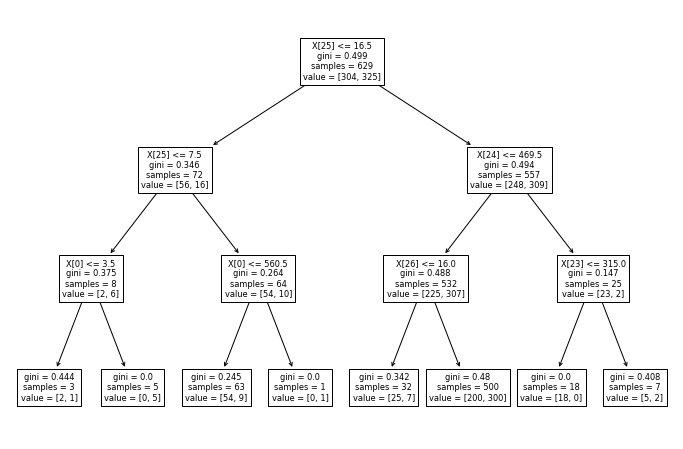

In [26]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 